The following implementation is borrowed from the following blog on StackAbuse: https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/

In [1]:
import bs4 as bs
import urllib.request
import re
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [2]:
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [4]:
from gensim.models import Word2Vec

word2vec = Word2Vec(all_words, min_count=2)

vocabulary = word2vec.wv.index_to_key
print(vocabulary)

['ai', 'intelligence', 'artificial', 'learning', 'human', 'machine', 'problems', 'many', 'networks', 'research', 'used', 'search', 'knowledge', 'neural', 'use', 'also', 'symbolic', 'may', 'researchers', 'computer', 'general', 'systems', 'field', 'machines', 'logic', 'problem', 'reasoning', 'data', 'mind', 'would', 'algorithms', 'solve', 'tools', 'intelligent', 'applications', 'could', 'humans', 'since', 'system', 'include', 'computing', 'specific', 'example', 'optimization', 'two', 'developed', 'ability', 'goals', 'one', 'decision', 'number', 'mathematical', 'information', 'however', 'approaches', 'including', 'program', 'based', 'recognition', 'theory', 'world', 'risk', 'well', 'agent', 'difficult', 'neurons', 'term', 'u', 'using', 'level', 'algorithm', 'deep', 'others', 'even', 'first', 'inputs', 'form', 'make', 'known', 'goal', 'input', 'sub', 'language', 'fiction', 'whether', 'several', 'widely', 'processing', 'people', 'approach', 'like', 'described', 'related', 'formal', 'methods

In [5]:
v1 = word2vec.wv['artificial']

In [8]:
v1.shape

(100,)

In [9]:
sim_words = word2vec.wv.most_similar('intelligence')
print(sim_words)

[('definition', 0.3976132571697235), ('ai', 0.3833257853984833), ('researchers', 0.3393787741661072), ('behavior', 0.33891043066978455), ('us', 0.33040851354599), ('machines', 0.32977166771888733), ('field', 0.32357528805732727), ('also', 0.3113861382007599), ('data', 0.30812421441078186), ('difficult', 0.30277594923973083)]


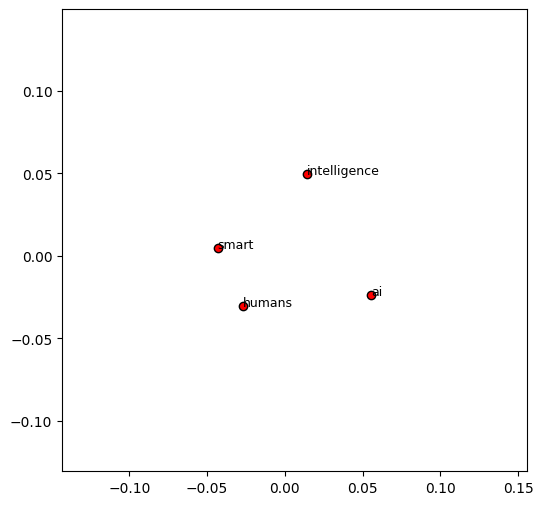

In [17]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def display_pca_scatterplot(model, words=None):
    if words == None:
        words = [word for word in model.wv.index_to_key]  # get all words

    word_vectors = [model.wv[word] for word in words]  # get vectors for specified words

    # perform PCA
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    # create a new matplotlib figure
    plt.figure(figsize=(6,6))
    
    # Manually set the plot area to be slightly larger than the range of the data
    margin = 0.1  # small margin
    min_x = min(twodim[:, 0]) - margin
    max_x = max(twodim[:, 0]) + margin
    min_y = min(twodim[:, 1]) - margin
    max_y = max(twodim[:, 1]) + margin
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word, fontsize=9)
    plt.show()


        
display_pca_scatterplot(word2vec, words=['ai', 'intelligence', 'smart', 'humans'])